In [1]:
import pandas as pd
data=pd.read_csv('../data/data_included.csv')

C:\Users\Ojas\AppData\Local\Temp\ipykernel_23168\2041111253.py:2: DtypeWarning: Columns (18,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../data/data_included.csv')


In [2]:
data=data[data.birth_date.str.len()==10]
data['birth_date']=pd.to_datetime(data['birth_date'], errors='coerce')
data['month']=data['birth_date'].dt.month.astype(str).astype(float)
data['day']=data['birth_date'].dt.day.astype(str).astype(float)

In [3]:
#Taurus—April 20-May 20
taurus=data[((data['month']==4) & (data['day']>19)) | ((data['month']==5) & (data['day']<21))]
#Gemini—May 21-June 20
gemini=data[((data['month']==5) & (data['day']>20)) | ((data['month']==6) & (data['day']<21))]
#Cancer—June 21-July 22
cancer=data[((data['month']==6) & (data['day']>20)) | ((data['month']==7) & (data['day']<23))]
#Leo—July 23-August 22
leo=data[((data['month']==7) & (data['day']>22)) | ((data['month']==8) & (data['day']<23))]
#Virgo—August 23-September 22
virgo=data[((data['month']==8) & (data['day']>22)) | ((data['month']==9) & (data['day']<23))]
#Libra—September 23-October 22
libra=data[((data['month']==9) & (data['day']>22)) | ((data['month']==10) & (data['day']<23))]
#Scorpio—October 23-November 21
scorpio=data[((data['month']==10) & (data['day']>22)) | ((data['month']==11) & (data['day']<22))]
#Sagittarius—November 22-December 21
sagittarius=data[((data['month']==11) & (data['day']>21)) | ((data['month']==12) & (data['day']<22))]
#Capricorn—December 22-January 19
capricorn=data[((data['month']==12) & (data['day']>21)) | ((data['month']==1) & (data['day']<20))]
#Aquarius—January 20-February 18
aquarius=data[((data['month']==1) & (data['day']>19)) | ((data['month']==2) & (data['day']<19))]
#Pisces—February 19-March 20
pisces=data[((data['month']==2) & (data['day']>18)) | ((data['month']==3) & (data['day']<21))]
#Aries—March 21-April 19
aries=data[((data['month']==3) & (data['day']>20)) | ((data['month']==4) & (data['day']<20))]


In [4]:
df=pd.DataFrame([aries.shape[0], taurus.shape[0], gemini.shape[0], cancer.shape[0], leo.shape[0], virgo.shape[0], libra.shape[0], scorpio.shape[0], sagittarius.shape[0], capricorn.shape[0], aquarius.shape[0], pisces.shape[0]] , columns=['count'], index=[ 'Aries','Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'])
df.index=pd.CategoricalIndex(df.index, categories=['Aries','Taurus', 'Gemini', 'Cancer', 'Leo', 'Virgo', 'Libra', 'Scorpio', 'Sagittarius', 'Capricorn', 'Aquarius', 'Pisces'], ordered=True)
df

,count
Aries,3293
Taurus,3527
Gemini,3415
Cancer,3557
Leo,3401
Virgo,3368
Libra,3270
Scorpio,3008
Sagittarius,3164
Capricorn,3226


In [5]:
df['percent']=df['count']/df['count'].sum()*100
df['percent']=df['percent'].round(2)
df

,count,percent
Aries,3293,8.25
Taurus,3527,8.84
Gemini,3415,8.56
Cancer,3557,8.91
Leo,3401,8.52
Virgo,3368,8.44
Libra,3270,8.20
Scorpio,3008,7.54
Sagittarius,3164,7.93
Capricorn,3226,8.09


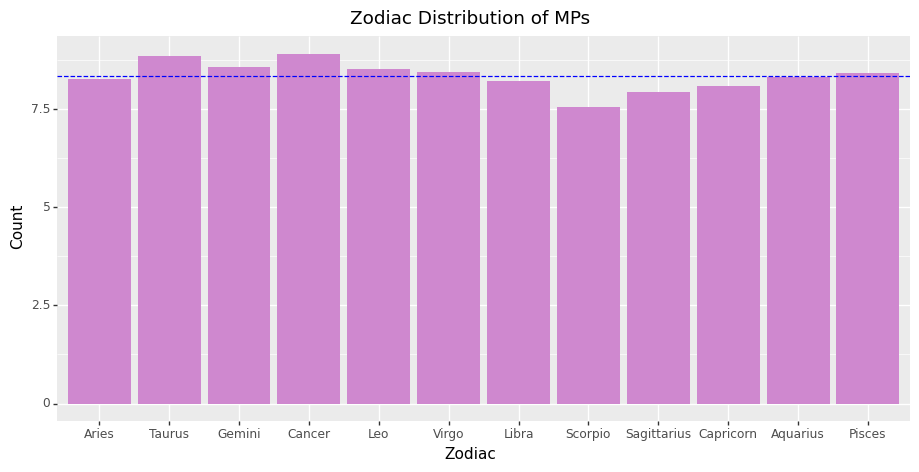

<ggplot: (195874954933)>

In [6]:
from plotnine import *
ggplot(df, aes(x=df.index, y='percent')) \
 + geom_bar(stat='identity', fill='#CF88CF') \
 + labs(x='Zodiac', y='Count') \
 + theme(figure_size=(11,5))\
 + labs(title='Zodiac Distribution of MPs')\
 + geom_hline(yintercept=8.33, linetype='dashed', color='blue')

In [7]:
# Scorpios tend to be loyal and honest, which is why they do not make successful politicians.
# Saggitarians also don't do well because they are optimistic and philosophical.
# Cancerians are charismatic, attractive, and manipulative, which is why they do well in politics.
# Taurus are resolute and pragmatic, which also makes them good politicians.


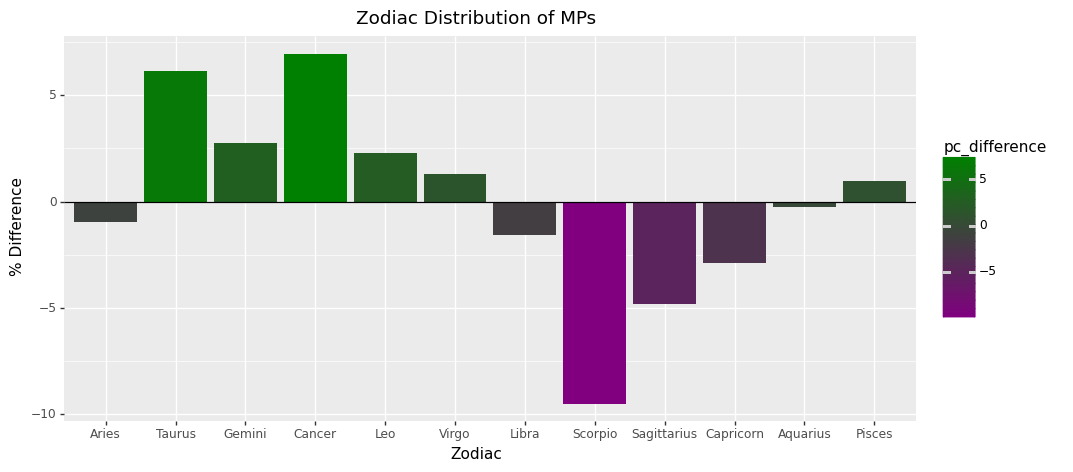

<ggplot: (195877856347)>

In [8]:
df['difference']=df['percent']-8.33
df['pc_difference']=df['difference']/8.33*100
ggplot(df, aes(x=df.index, y='pc_difference', fill='pc_difference')) \
 + geom_bar(stat='identity') \
 + labs(x='Zodiac', y='% Difference') \
 + theme(figure_size=(11,5))\
 + labs(title='Zodiac Distribution of MPs')\
 + scale_fill_gradient(low='purple', high='green')\
 + geom_hline(yintercept=0, linetype='solid', color='black')

# Chinese Zodiac

In [9]:
rabbit=[1915, 1927, 1939, 1951, 1963, 1975, 1987, 1999, 2011, 2023]
dragon=[1916, 1928, 1940, 1952, 1964, 1976, 1988, 2000, 2012, 2024]
snake=[1917, 1929, 1941, 1953, 1965, 1977, 1989, 2001, 2013, 2025]
horse=[1918, 1930, 1942, 1954, 1966, 1978, 1990, 2002, 2014, 2026]
sheep=[1919, 1931, 1943, 1955, 1967, 1979, 1991, 2003, 2015, 2027]
monkey=[1920, 1932, 1944, 1956, 1968, 1980, 1992, 2004, 2016, 2028]
rooster=[1921, 1933, 1945, 1957, 1969, 1981, 1993, 2005, 2017, 2029]
dog=[1922, 1934, 1946, 1958, 1970, 1982, 1994, 2006, 2018, 2030]
pig=[1923, 1935, 1947, 1959, 1971, 1983, 1995, 2007, 2019, 2031]
rat=[1924, 1936, 1948, 1960, 1972, 1984, 1996, 2008, 2020, 2032]
ox=[1925, 1937, 1949, 1961, 1973, 1985, 1997, 2009, 2021, 2033]
tiger=[1926, 1938, 1950, 1962, 1974, 1986, 1998, 2010, 2022, 2034]


In [12]:
def year_to_zodiac(year):
    if year in rabbit:
        return 'Rabbit'
    if year in dragon:
        return 'Dragon'
    if year in snake:
        return 'Snake'
    if year in horse:
        return 'Horse'
    if year in sheep:
        return 'Sheep'
    if year in monkey:
        return 'Monkey'
    if year in rooster:
        return 'Rooster'
    if year in dog:
        return 'Dog'
    if year in pig:
        return 'Pig'
    if year in rat:
        return 'Rat'
    if year in ox:
        return 'Ox'
    if year in tiger:
        return 'Tiger'

In [42]:
data=pd.read_csv('../data/data_included.csv')
data['birth_date']=pd.to_datetime(data['birth_date'], errors='coerce')
data['year']=data['birth_date'].dt.year
data['zodiac']=data['year'].apply(year_to_zodiac)
count_df=data.groupby('zodiac').count()[['name']]
count_df['percent']=count_df['name']/count_df['name'].sum()*100
count_df['percent']=count_df['percent'].round(2)
count_df['difference']=count_df['percent']-8.33
count_df['pc_difference']=(count_df['difference']/8.33*100).round(2)
count_df=count_df.reindex(['Rabbit', 'Dragon', 'Snake', 'Horse', 'Sheep', 'Monkey', 'Rooster', 'Dog', 'Pig', 'Rat', 'Ox', 'Tiger'])
count_df.index=pd.CategoricalIndex(['Rabbit', 'Dragon', 'Snake', 'Horse', 'Sheep', 'Monkey', 'Rooster', 'Dog', 'Pig', 'Rat', 'Ox', 'Tiger'], ordered=True)
count_df

C:\Users\Ojas\AppData\Local\Temp\ipykernel_23168\3295137955.py:1: DtypeWarning: Columns (18,19,20,22) have mixed types. Specify dtype option on import or set low_memory=False.


,name,percent,difference,pc_difference
Rabbit,3667,8.51,0.18,2.16
Dragon,3664,8.51,0.18,2.16
Snake,3566,8.28,-0.05,-0.60
Horse,3591,8.34,0.01,0.12
Sheep,3654,8.48,0.15,1.80
Monkey,3563,8.27,-0.06,-0.72
Rooster,3509,8.15,-0.18,-2.16
Dog,3529,8.19,-0.14,-1.68
Pig,3533,8.20,-0.13,-1.56
Rat,3748,8.70,0.37,4.44


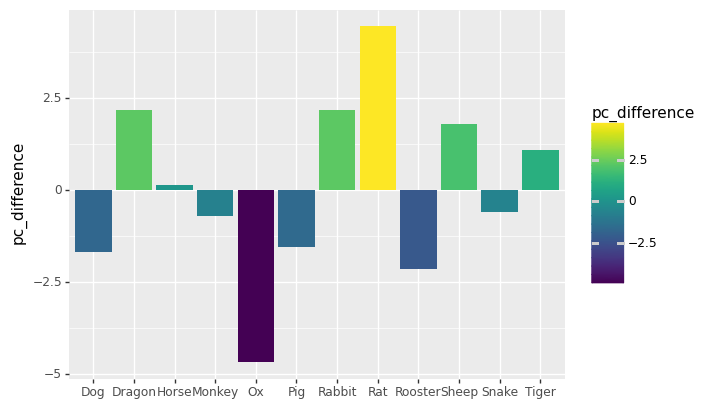

<ggplot: (195907438294)>

In [46]:
from plotnine import *
ggplot(count_df, aes(x=count_df.index, y='pc_difference', fill='pc_difference')) \
    + geom_bar(stat='identity')